# Assignment 2: LeNet-5 Implementation and Layer-wise Analysis

## Step 1: Load and Preprocess MNIST

Train samples: 60000
Test samples: 10000
Original image shape: (28, 28)
Final image shape: (28, 28, 1)


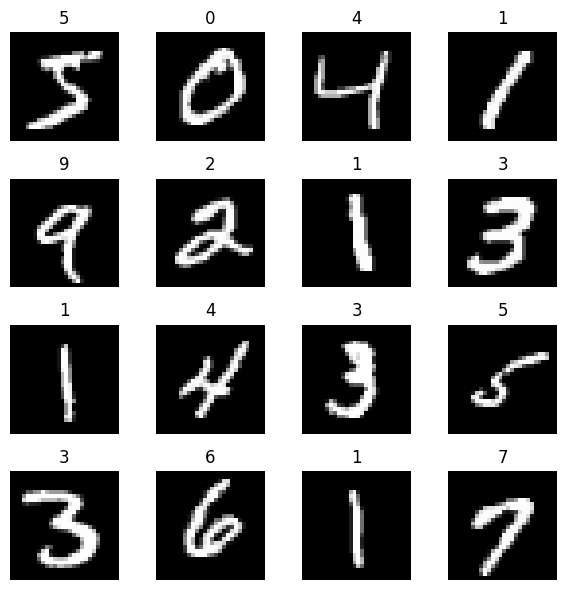

In [14]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# For Reproducibility
SEED = 42
np.random.seed(SEED)
tf.random.set_seed(SEED)

from tensorflow.keras.datasets import mnist

# Load
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Report shape + counts
print("Train samples:", x_train.shape[0])
print("Test samples:", x_test.shape[0])
print("Original image shape:", x_train.shape[1:])  # (28, 28)

# Normalize to [0,1]
x_train = x_train.astype("float32") / 255.0
x_test  = x_test.astype("float32") / 255.0

# Add channel dimension: (28,28) -> (28,28,1)
x_train = np.expand_dims(x_train, axis=-1)
x_test  = np.expand_dims(x_test, axis=-1)

print("Final image shape:", x_train.shape[1:])  # (28, 28, 1)

# Show 16 sample images
plt.figure(figsize=(6,6))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(x_train[i].squeeze(), cmap="gray")
    plt.title(str(y_train[i]))
    plt.axis("off")
plt.tight_layout()
plt.show()



## Step 2: Implement LeNet-5 Using the Functional API

In [15]:
def build_lenet5():
    inputs = keras.Input(shape=(28, 28, 1), name="input")

    # C1: Conv
    x = layers.Conv2D(6, kernel_size=5, activation="tanh", padding="same", name="conv1")(inputs)
    # S2: Pool
    x = layers.AveragePooling2D(pool_size=2, name="pool1")(x)

    # C3: Conv
    x = layers.Conv2D(16, kernel_size=5, activation="tanh", padding="valid", name="conv2")(x)
    # S4: Pool
    x = layers.AveragePooling2D(pool_size=2, name="pool2")(x)

    # Flatten
    x = layers.Flatten(name="flatten")(x)

    # FC layers
    x = layers.Dense(120, activation="tanh", name="fc1")(x)
    x = layers.Dense(84, activation="tanh", name="fc2")(x)

    # Output
    outputs = layers.Dense(10, activation="softmax", name="output")(x)

    model = keras.Model(inputs, outputs, name="LeNet5")
    return model

model = build_lenet5()
model.summary()


Model: "LeNet5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input (InputLayer)              │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1 (Conv2D)                  │ (None, 28, 28, 6)      │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool1 (AveragePooling2D)        │ (None, 14, 14, 6)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2 (Conv2D)                  │ (None, 10, 10, 16)     │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool2 (AveragePooling2D)        │ (None, 5, 5, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 120)            │        48,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │           850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 61,706 (241.04 KB)

 Trainable params: 61,706 (241.04 KB)

 Non-trainable params: 0 (0.00 B)

## Step 3: Train the LeNet-5 Model

Epoch 1/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 33s 73ms/step - accuracy: 0.8152 - loss: 0.6493 - val_accuracy: 0.9655 - val_loss: 0.1292
Epoch 2/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 40s 70ms/step - accuracy: 0.9549 - loss: 0.1472 - val_accuracy: 0.9757 - val_loss: 0.0839
Epoch 3/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 40s 68ms/step - accuracy: 0.9724 - loss: 0.0920 - val_accuracy: 0.9785 - val_loss: 0.0680
Epoch 4/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 41s 68ms/step - accuracy: 0.9799 - loss: 0.0665 - val_accuracy: 0.9815 - val_loss: 0.0610
Epoch 5/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 31s 73ms/step - accuracy: 0.9847 - loss: 0.0506 - val_accuracy: 0.9838 - val_loss: 0.0572
Epoch 6/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 31s 74ms/step - accuracy: 0.9882 - loss: 0.0398 - val_accuracy: 0.9842 - val_loss: 0.0554
Epoch 7/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 30s 72ms/step - accuracy: 0.9908 - loss: 0.0321 - val_accuracy: 0.9835 - val_loss: 0.0541
Epoch 8/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 31s 73ms/step - accuracy: 0.9931 - loss: 0.0260 - 

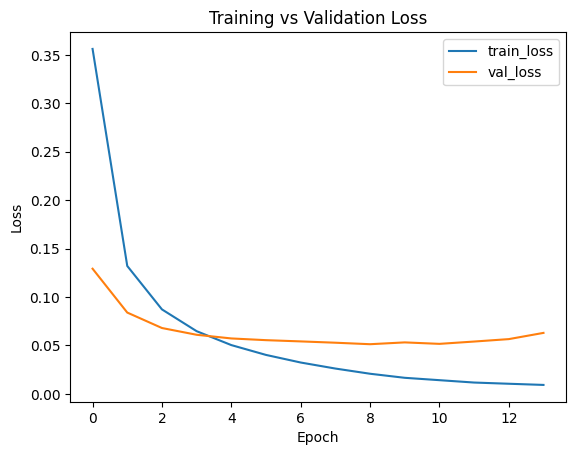

In [16]:
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-3),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

callbacks = [
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)
]

history = model.fit(
    x_train, y_train,
    validation_split=0.1,
    epochs=30,              # small GPU friendly
    batch_size=128,
    callbacks=callbacks,
    verbose=1
)

# Evaluate
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"Test accuracy: {test_acc:.4f}")

# Plot training & validation loss
plt.figure()
plt.plot(history.history["loss"], label="train_loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.title("Training vs Validation Loss")
plt.show()


## Step 4: Layer-wise Noise Injection Experiment

In [17]:
def get_split_models(full_model, layer_name):
    """
    Returns:
      model_before: input -> chosen layer output
      model_after: chosen layer output -> final output
    """
    layer = full_model.get_layer(layer_name)

    # model_before: from original input to chosen layer output
    model_before = keras.Model(full_model.input, layer.output)

    # model_after: new input shaped like layer.output -> run remaining layers
    new_input = keras.Input(shape=layer.output.shape[1:])
    x = new_input
    take = False
    for l in full_model.layers:
        if l.name == layer_name:
            take = True
            continue
        if take:
            x = l(x)
    model_after = keras.Model(new_input, x)
    return model_before, model_after


### Noise injection experiment

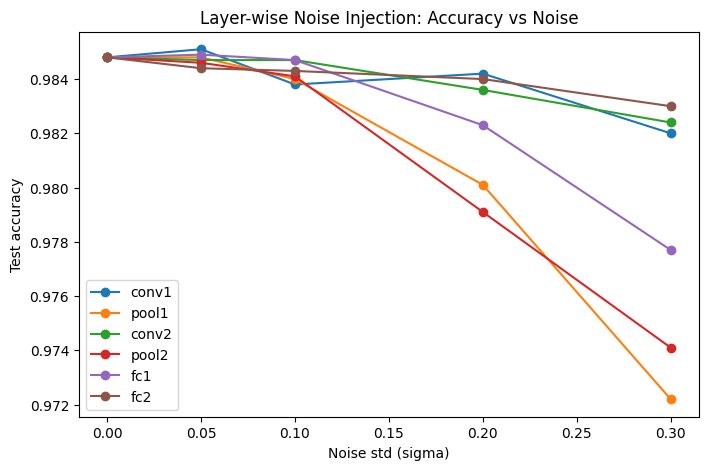

conv1 -> ['0.985', '0.985', '0.984', '0.984', '0.982']
pool1 -> ['0.985', '0.985', '0.984', '0.980', '0.972']
conv2 -> ['0.985', '0.985', '0.985', '0.984', '0.982']
pool2 -> ['0.985', '0.985', '0.984', '0.979', '0.974']
fc1 -> ['0.985', '0.985', '0.985', '0.982', '0.978']
fc2 -> ['0.985', '0.984', '0.984', '0.984', '0.983']


In [18]:
layers_to_test = ["conv1", "pool1", "conv2", "pool2", "fc1", "fc2"]
noise_levels = [0.0, 0.05, 0.1, 0.2, 0.3]   # small set = faster

results_noise = {ln: [] for ln in layers_to_test}

for ln in layers_to_test:
    mb, ma = get_split_models(model, ln)

    # compute clean intermediate outputs once (speed)
    inter = mb.predict(x_test, batch_size=256, verbose=0)

    for sigma in noise_levels:
        noisy_inter = inter + np.random.normal(0, sigma, size=inter.shape).astype("float32")
        preds = ma.predict(noisy_inter, batch_size=256, verbose=0)
        y_pred = np.argmax(preds, axis=1)
        acc = np.mean(y_pred == y_test)
        results_noise[ln].append(acc)

# layer vs accuracy curves per noise
plt.figure(figsize=(8,5))
for ln in layers_to_test:
    plt.plot(noise_levels, results_noise[ln], marker="o", label=ln)
plt.xlabel("Noise std (sigma)")
plt.ylabel("Test accuracy")
plt.title("Layer-wise Noise Injection: Accuracy vs Noise")
plt.legend()
plt.show()

# Print table
for ln in layers_to_test:
    print(ln, "->", ["{:.3f}".format(a) for a in results_noise[ln]])


## Step 5: Layer-wise Training Experiment

Only training conv1 -> test acc: 0.2585
Only training conv2 -> test acc: 0.7788
Only training fc1 -> test acc: 0.9108
Only training fc2 -> test acc: 0.8809
Only training output -> test acc: 0.8200


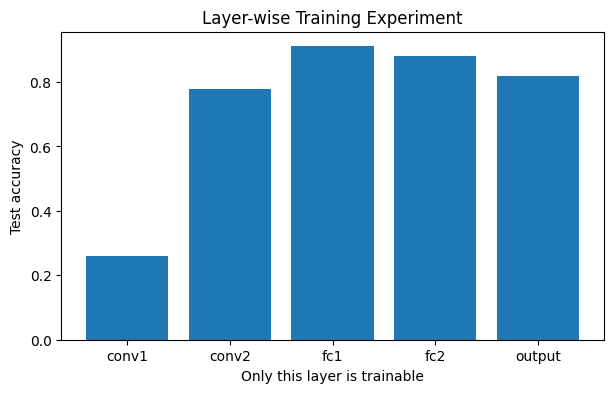

In [19]:
def compile_and_train_one_layer(trainable_layer_name, epochs=3):
    m = build_lenet5()

    # Freeze everything
    for l in m.layers:
        l.trainable = False

    # Unfreeze only the chosen layer
    m.get_layer(trainable_layer_name).trainable = True

    m.compile(
        optimizer=keras.optimizers.Adam(1e-3),
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"]
    )

    m.fit(
        x_train, y_train,
        validation_split=0.1,
        epochs=epochs,
        batch_size=128,
        verbose=0
    )

    _, acc = m.evaluate(x_test, y_test, verbose=0)
    return acc

train_layers = ["conv1", "conv2", "fc1", "fc2", "output"]
acc_one_layer = []

for ln in train_layers:
    acc = compile_and_train_one_layer(ln, epochs=3)
    acc_one_layer.append(acc)
    print(f"Only training {ln} -> test acc: {acc:.4f}")

# Plot
plt.figure(figsize=(7,4))
plt.bar(train_layers, acc_one_layer)
plt.xlabel("Only this layer is trainable")
plt.ylabel("Test accuracy")
plt.title("Layer-wise Training Experiment")
plt.show()
